In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("netflix")

In [3]:
df.head(5)   #dataset

,Unnamed: 0,title,popular_rank,certificate,startYear,endYear,episodes,runtime,type,orign_country,language,plot,rating,numVotes,genres,isAdult,cast
0,0,Lucifer,1,15,2016.0,NaN,93.0,42,tvSeries,United States,English,Lucifer Morningstar has decided he's had enoug...,8.1,250884.0,"Crime,Drama,Fantasy",0,"['Tom Ellis', 'Lauren German', 'Lesley-Ann Bra..."
1,1,Army of the Dead,2,18,2021.0,NaN,NaN,148,movie,United States,English,"Following a zombie outbreak in Las Vegas, a gr...",5.8,110780.0,"Action,Crime,Horror",0,"['Dave Bautista', 'Ella Purnell', 'Ana de la R..."
2,2,The Kominsky Method,3,18,2018.0,2021.0,22.0,30,tvSeries,United States,English,"An aging actor, who long ago enjoyed a brush w...",8.2,28795.0,"Comedy,Drama",0,"['Michael Douglas', 'Sarah Baker', 'Graham Rog..."
3,3,Friends,4,13+,1994.0,2004.0,235.0,22,tvSeries,United States,English,Follows the personal and professional lives of...,8.9,861843.0,"Comedy,Romance",0,"['Jennifer Aniston', 'Courteney Cox', 'Lisa Ku..."
4,4,Ragnarok,5,18,2020.0,NaN,12.0,45,tvSeries,Norway,Norwegian,A small Norwegian town experiencing warm winte...,7.5,26606.0,"Action,Drama,Fantasy",0,"['David Stakston', 'Jonas Strand Gravli', 'Her..."


## CLEANING OF DATA SET

In [4]:
df.rename(columns={"Unnamed: 0":"sr no"},inplace=True)    #rename unnamed:0 to srno

In [5]:
df.set_index("sr no",inplace=True)         #set srno as index

In [45]:
df.head(2)

,title,popular_rank,certificate,startYear,endYear,episodes,runtime,type,orign_country,language,plot,rating,numVotes,genres,cast
sr no,,,,,,,,,,,,,,,
0,Lucifer,1,15,2016.0,0.0,93.0,42,tvSeries,United States,English,Lucifer Morningstar has decided he's had enoug...,8.1,250884.0,"Crime,Drama,Fantasy","['Tom Ellis', 'Lauren German', 'Lesley-Ann Bra..."
1,Army of the Dead,2,18,2021.0,0.0,0.0,148,movie,United States,English,"Following a zombie outbreak in Las Vegas, a gr...",5.8,110780.0,"Action,Crime,Horror","['Dave Bautista', 'Ella Purnell', 'Ana de la R..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 500
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          501 non-null    object 
 1   popular_rank   501 non-null    int64  
 2   certificate    448 non-null    object 
 3   startYear      501 non-null    float64
 4   endYear        180 non-null    float64
 5   episodes       304 non-null    float64
 6   runtime        501 non-null    object 
 7   type           501 non-null    object 
 8   orign_country  501 non-null    object 
 9   language       501 non-null    object 
 10  plot           501 non-null    object 
 11  rating         488 non-null    float64
 12  numVotes       488 non-null    float64
 13  genres         501 non-null    object 
 14  isAdult        501 non-null    int64  
 15  cast           501 non-null    object 
dtypes: float64(5), int64(2), object(9)
memory usage: 66.5+ KB


In [8]:
#first replace the nan value present in data
df.endYear.replace(np.nan,0,inplace=True)
df.episodes.replace(np.nan,0,inplace=True)
df.certificate.replace(np.nan,"Not Rated",inplace=True)
df.rating.replace("Nan",np.nan,inplace=True)
df.rating.fillna(method='bfill',inplace=True)
df.numVotes.fillna(method='bfill',inplace=True)


In [9]:
df.head(5)

,title,popular_rank,certificate,startYear,endYear,episodes,runtime,type,orign_country,language,plot,rating,numVotes,genres,isAdult,cast
sr no,,,,,,,,,,,,,,,,
0,Lucifer,1,15,2016.0,0.0,93.0,42,tvSeries,United States,English,Lucifer Morningstar has decided he's had enoug...,8.1,250884.0,"Crime,Drama,Fantasy",0,"['Tom Ellis', 'Lauren German', 'Lesley-Ann Bra..."
1,Army of the Dead,2,18,2021.0,0.0,0.0,148,movie,United States,English,"Following a zombie outbreak in Las Vegas, a gr...",5.8,110780.0,"Action,Crime,Horror",0,"['Dave Bautista', 'Ella Purnell', 'Ana de la R..."
2,The Kominsky Method,3,18,2018.0,2021.0,22.0,30,tvSeries,United States,English,"An aging actor, who long ago enjoyed a brush w...",8.2,28795.0,"Comedy,Drama",0,"['Michael Douglas', 'Sarah Baker', 'Graham Rog..."
3,Friends,4,13+,1994.0,2004.0,235.0,22,tvSeries,United States,English,Follows the personal and professional lives of...,8.9,861843.0,"Comedy,Romance",0,"['Jennifer Aniston', 'Courteney Cox', 'Lisa Ku..."
4,Ragnarok,5,18,2020.0,0.0,12.0,45,tvSeries,Norway,Norwegian,A small Norwegian town experiencing warm winte...,7.5,26606.0,"Action,Drama,Fantasy",0,"['David Stakston', 'Jonas Strand Gravli', 'Her..."


In [10]:
df.isAdult.value_counts()  # as isadult contain 0  in all rows

0    501
Name: isAdult, dtype: int64

In [11]:
df.drop(columns=("isAdult"),axis=1,inplace=True)   #dropping isAdult columns

In [12]:
df.isna().sum()  #removing all nan values

title            0
popular_rank     0
certificate      0
startYear        0
endYear          0
episodes         0
runtime          0
type             0
orign_country    0
language         0
plot             0
rating           0
numVotes         0
genres           0
cast             0
dtype: int64

In [13]:
df.head(5)                        # final data set

,title,popular_rank,certificate,startYear,endYear,episodes,runtime,type,orign_country,language,plot,rating,numVotes,genres,cast
sr no,,,,,,,,,,,,,,,
0,Lucifer,1,15,2016.0,0.0,93.0,42,tvSeries,United States,English,Lucifer Morningstar has decided he's had enoug...,8.1,250884.0,"Crime,Drama,Fantasy","['Tom Ellis', 'Lauren German', 'Lesley-Ann Bra..."
1,Army of the Dead,2,18,2021.0,0.0,0.0,148,movie,United States,English,"Following a zombie outbreak in Las Vegas, a gr...",5.8,110780.0,"Action,Crime,Horror","['Dave Bautista', 'Ella Purnell', 'Ana de la R..."
2,The Kominsky Method,3,18,2018.0,2021.0,22.0,30,tvSeries,United States,English,"An aging actor, who long ago enjoyed a brush w...",8.2,28795.0,"Comedy,Drama","['Michael Douglas', 'Sarah Baker', 'Graham Rog..."
3,Friends,4,13+,1994.0,2004.0,235.0,22,tvSeries,United States,English,Follows the personal and professional lives of...,8.9,861843.0,"Comedy,Romance","['Jennifer Aniston', 'Courteney Cox', 'Lisa Ku..."
4,Ragnarok,5,18,2020.0,0.0,12.0,45,tvSeries,Norway,Norwegian,A small Norwegian town experiencing warm winte...,7.5,26606.0,"Action,Drama,Fantasy","['David Stakston', 'Jonas Strand Gravli', 'Her..."


In [14]:
df.nunique() #cheking for columns

title            501
popular_rank     501
certificate       18
startYear         43
endYear           29
episodes         139
runtime          119
type               4
orign_country     29
language          22
plot             501
rating            56
numVotes         486
genres           143
cast             501
dtype: int64

## Counting for the rated movies in data set

Text(0, 0.5, 'COUNTS')

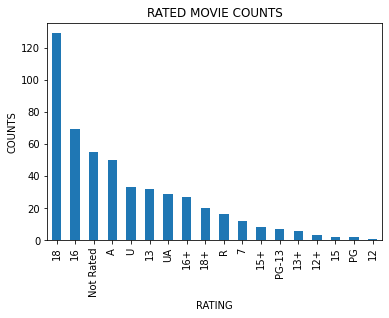

In [15]:
df.certificate.value_counts().plot(kind="bar")      
plt.title("RATED MOVIE COUNTS")
plt.xlabel("RATING")
plt.ylabel("COUNTS")

In [16]:
df.value_counts("certificate") #To know the exact count

certificate
18           129
16            69
Not Rated     55
A             50
U             33
13            32
UA            29
16+           27
18+           20
R             16
7             12
15+            8
PG-13          7
13+            6
12+            3
15             2
PG             2
12             1
dtype: int64

In [17]:
rate=df[df["certificate"]=="18"].sort_values(by="title")    # to know show with 18+rating

In [18]:
rate.head(5)

,title,popular_rank,certificate,startYear,endYear,episodes,runtime,type,orign_country,language,plot,rating,numVotes,genres,cast
sr no,,,,,,,,,,,,,,,
272,6 Underground,273,18,2019.0,0.0,0.0,128,movie,United States,English,"Six individuals from all around the globe, eac...",6.1,146930.0,"Action,Thriller","['Ryan Reynolds', 'Mélanie Laurent', 'Manuel G..."
198,After Life,199,18,2019.0,0.0,18.0,30,tvSeries,United Kingdom,English,"After Tony's wife dies unexpectedly, his nice-...",8.4,89950.0,"Comedy,Drama","['Ricky Gervais', 'Tom Basden', 'Tony Way', 'D..."
409,Alice in Borderland,411,18,2020.0,0.0,9.0,50,tvSeries,Japan,English,A group of bored delinquents are transported t...,7.7,21122.0,"Action,Fantasy,Mystery","['Kento Yamazaki', 'Tao Tsuchiya', 'Nijirô Mur..."
189,American Crime Story,190,18,2016.0,0.0,27.0,42,tvSeries,United States,English,An anthology series centered around America's ...,8.4,82040.0,"Biography,Crime,Drama","['Sarah Paulson', 'Annaleigh Ashford', 'Sterli..."
120,Animal Kingdom,121,18,2016.0,0.0,65.0,60,tvSeries,United States,English,"Centers on a Southern California family, whose...",8.2,25192.0,"Crime,Drama","['Shawn Hatosy', 'Ben Robson', 'Jake Weary', '..."


## To know the stating year of series

In [19]:
df.startYear.value_counts().head()  #To know the exact count of top 5

2020.0    59
2021.0    58
2017.0    45
2016.0    42
2019.0    41
Name: startYear, dtype: int64

<AxesSubplot:>

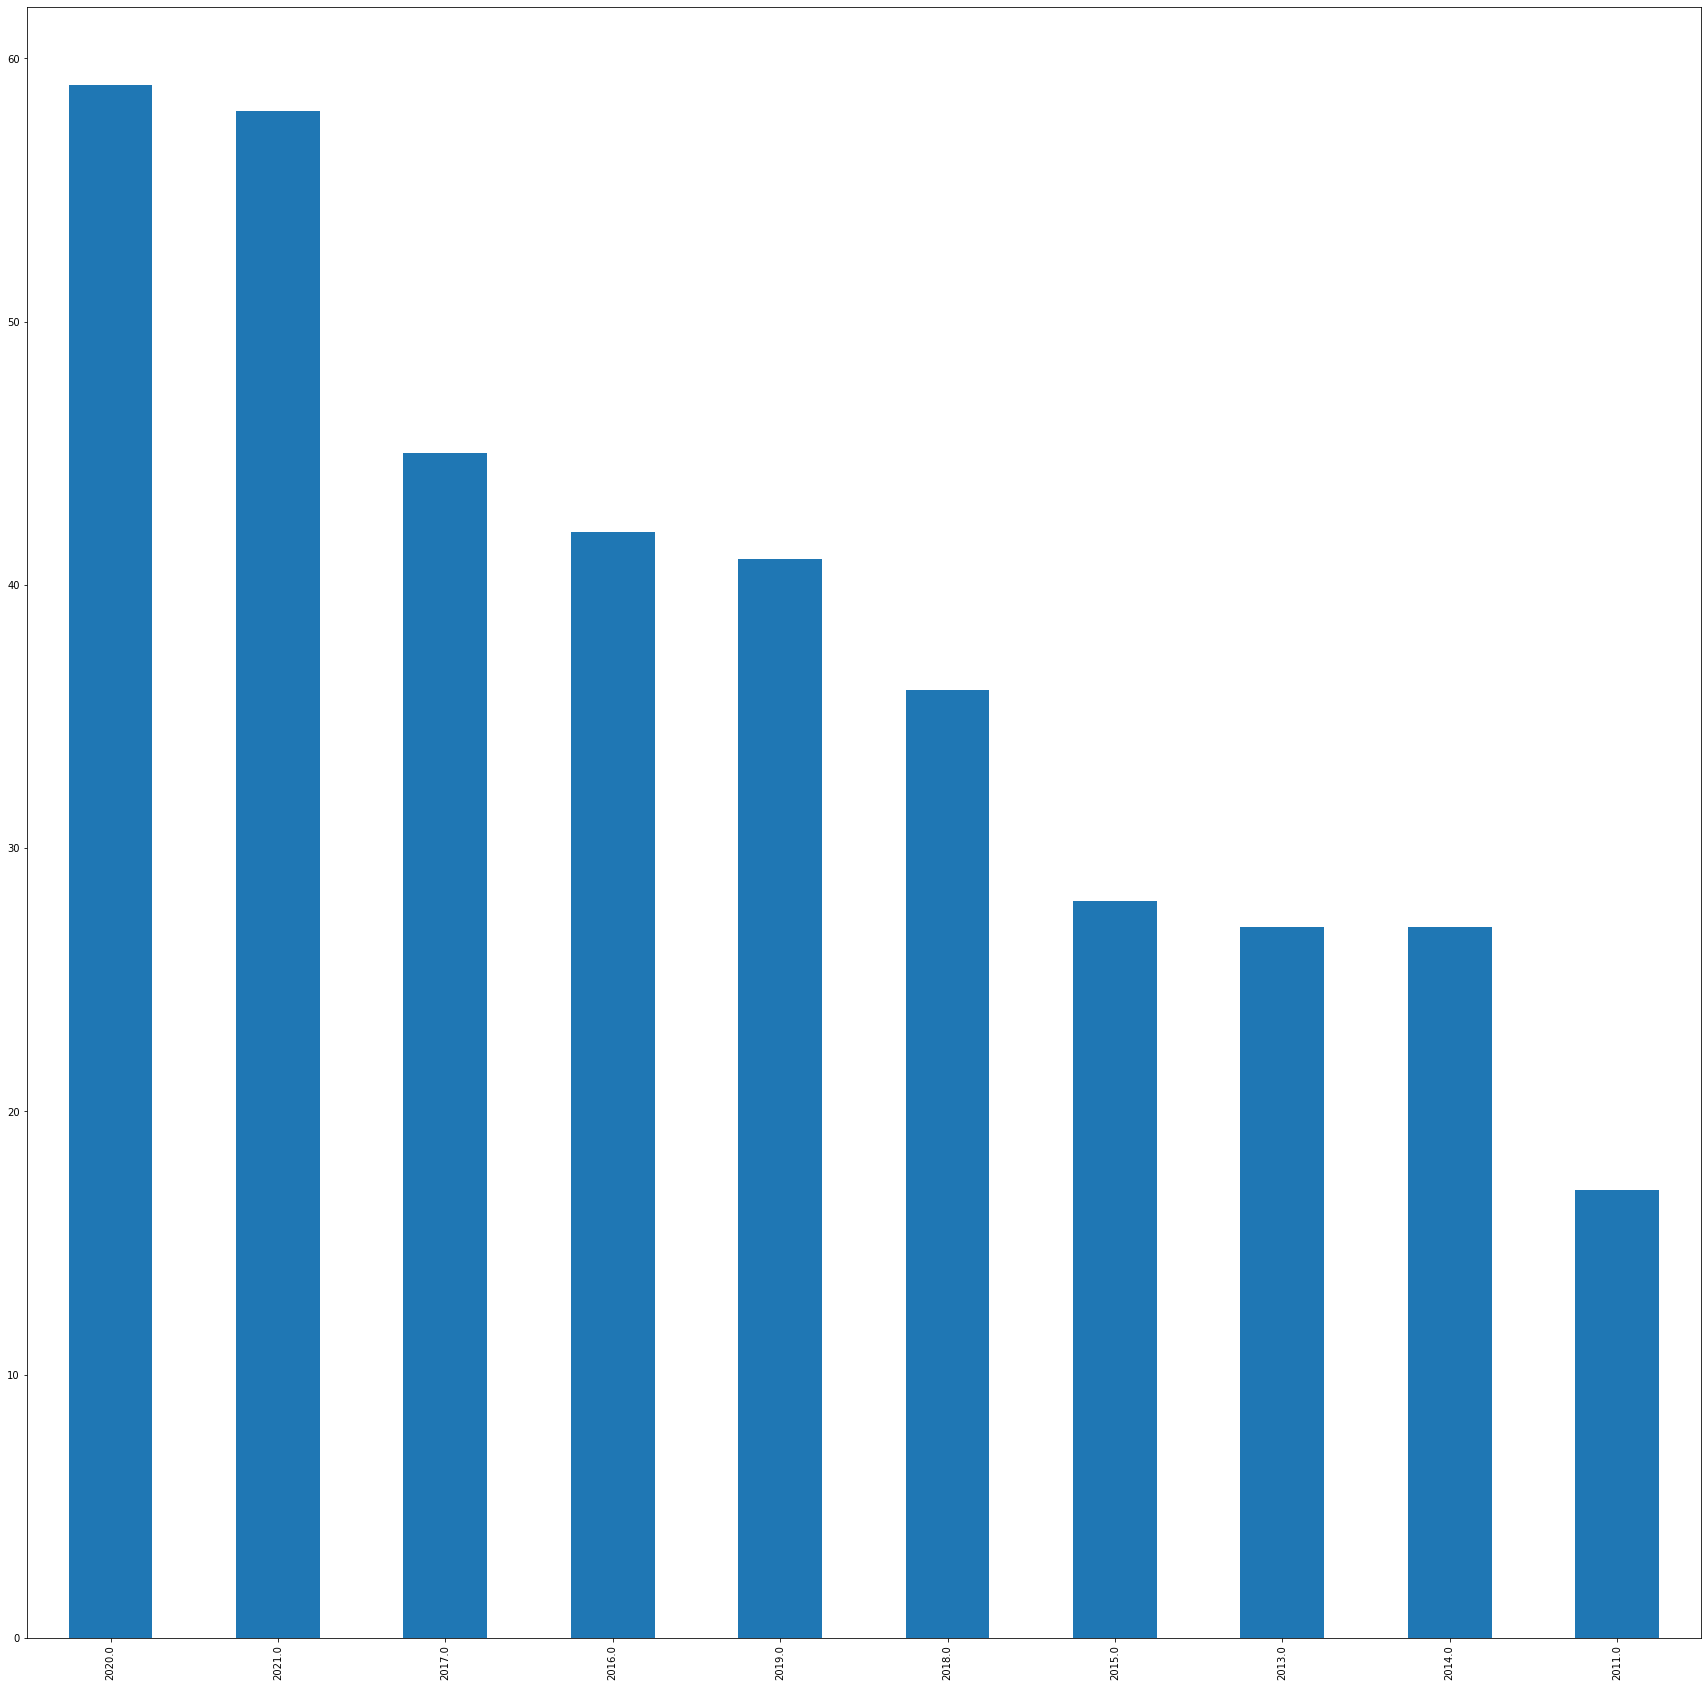

In [20]:
plt.figure(figsize=(30,30))
df.startYear.value_counts().nlargest(10).plot(kind="bar")  #taking only top 10 into consideration

## TO KNOW THE END YEAR

<AxesSubplot:>

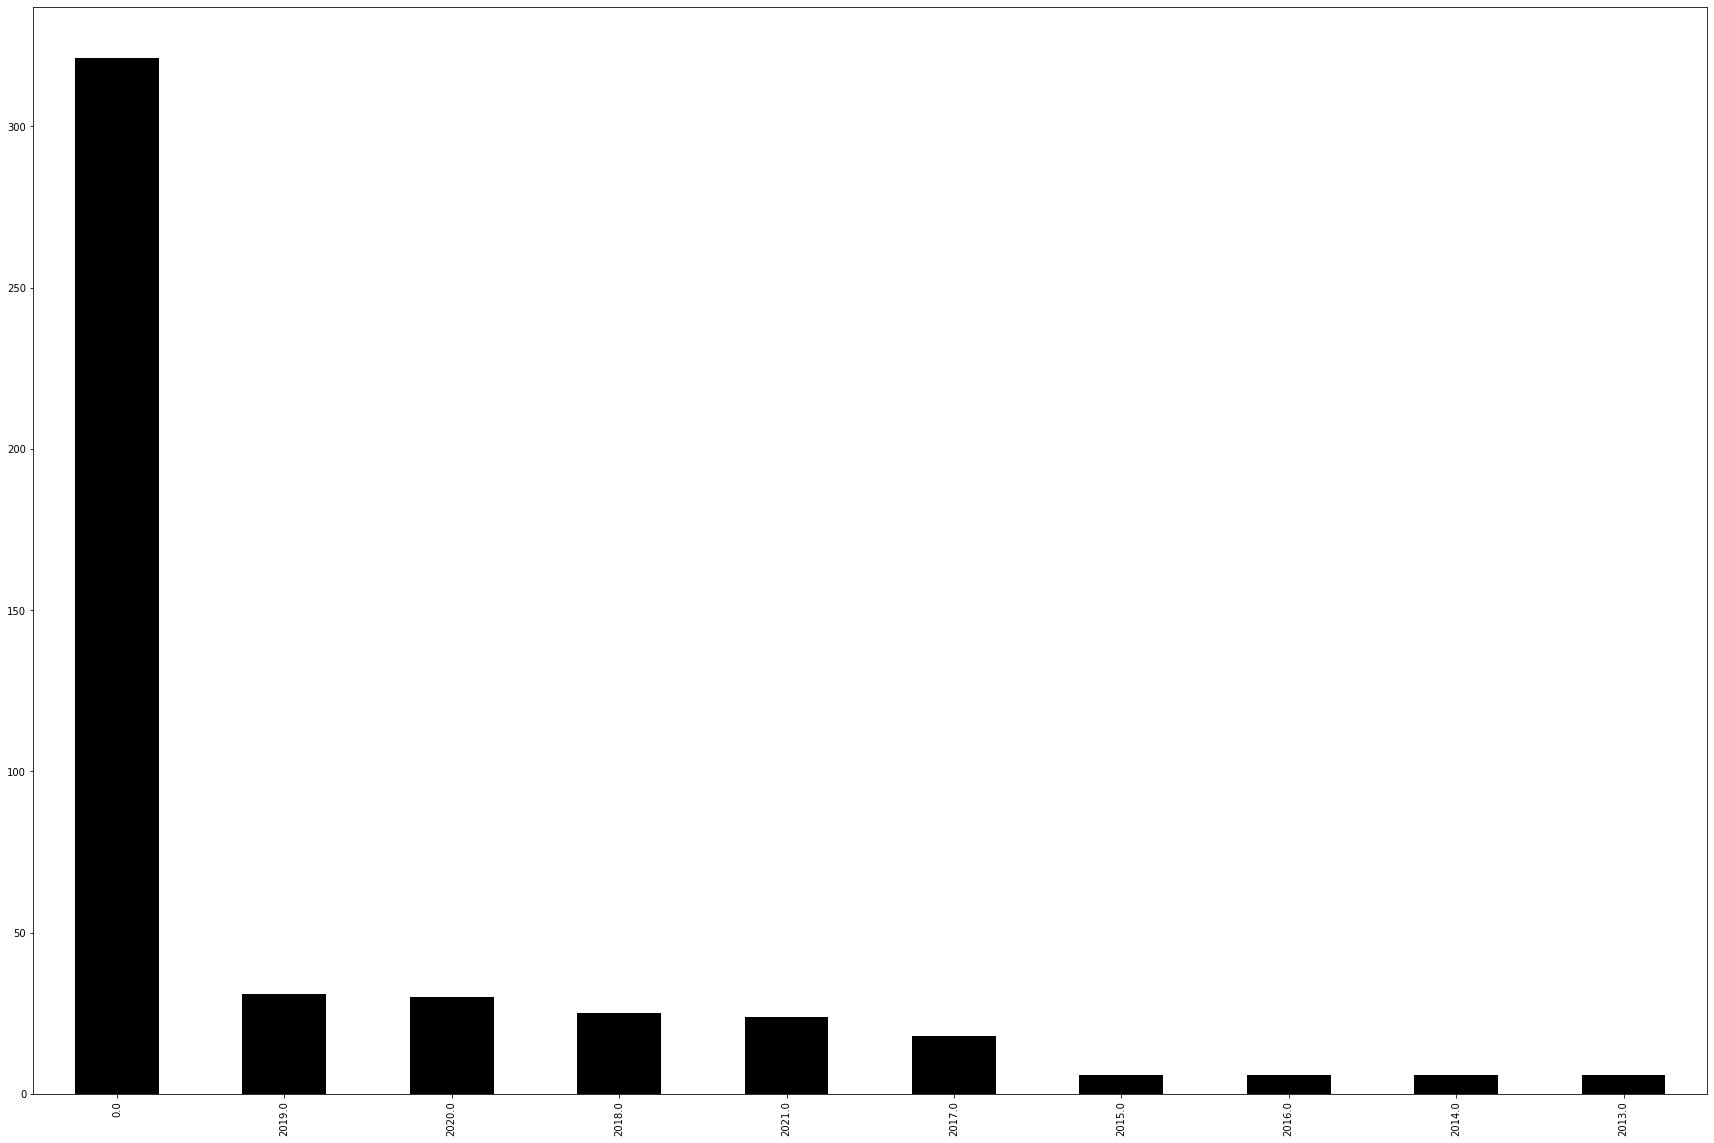

In [21]:
plt.figure(figsize=(30,20))
df.endYear.value_counts().nlargest(10).plot(kind="bar",color="black") #taking only top 10 into consideration

In [22]:
df.endYear.value_counts().head(5)  #To know the exact count

0.0       321
2019.0     31
2020.0     30
2018.0     25
2021.0     24
Name: endYear, dtype: int64

In [23]:
df[df["endYear"]==0].sort_values(by="sr no").head(5) #To know the endyear with 0 episode that is the movie

,title,popular_rank,certificate,startYear,endYear,episodes,runtime,type,orign_country,language,plot,rating,numVotes,genres,cast
sr no,,,,,,,,,,,,,,,
0,Lucifer,1,15,2016.0,0.0,93.0,42,tvSeries,United States,English,Lucifer Morningstar has decided he's had enoug...,8.1,250884.0,"Crime,Drama,Fantasy","['Tom Ellis', 'Lauren German', 'Lesley-Ann Bra..."
1,Army of the Dead,2,18,2021.0,0.0,0.0,148,movie,United States,English,"Following a zombie outbreak in Las Vegas, a gr...",5.8,110780.0,"Action,Crime,Horror","['Dave Bautista', 'Ella Purnell', 'Ana de la R..."
4,Ragnarok,5,18,2020.0,0.0,12.0,45,tvSeries,Norway,Norwegian,A small Norwegian town experiencing warm winte...,7.5,26606.0,"Action,Drama,Fantasy","['David Stakston', 'Jonas Strand Gravli', 'Her..."
6,Grey's Anatomy,7,15+,2005.0,0.0,381.0,41,tvSeries,United States,English,A drama centered on the personal and professio...,7.5,260703.0,"Drama,Romance","['Ellen Pompeo', 'Chandra Wilson', 'James Pick..."
7,Sweet Tooth,8,16,2021.0,0.0,8.0,\N,tvSeries,United States,English,A boy who is half human and half deer survives...,8.2,9622.0,"Action,Adventure,Drama","['Nonso Anozie', 'Christian Convery', 'Stefani..."


## TO KNOW THE EPISODES

In [24]:
df.episodes.value_counts() #To know the exact count of episodes 

0.0      197
20.0      11
16.0      11
30.0      11
8.0       10
        ... 
227.0      1
97.0       1
68.0       1
86.0       1
415.0      1
Name: episodes, Length: 139, dtype: int64

Text(0, 0.5, 'EPISODES')

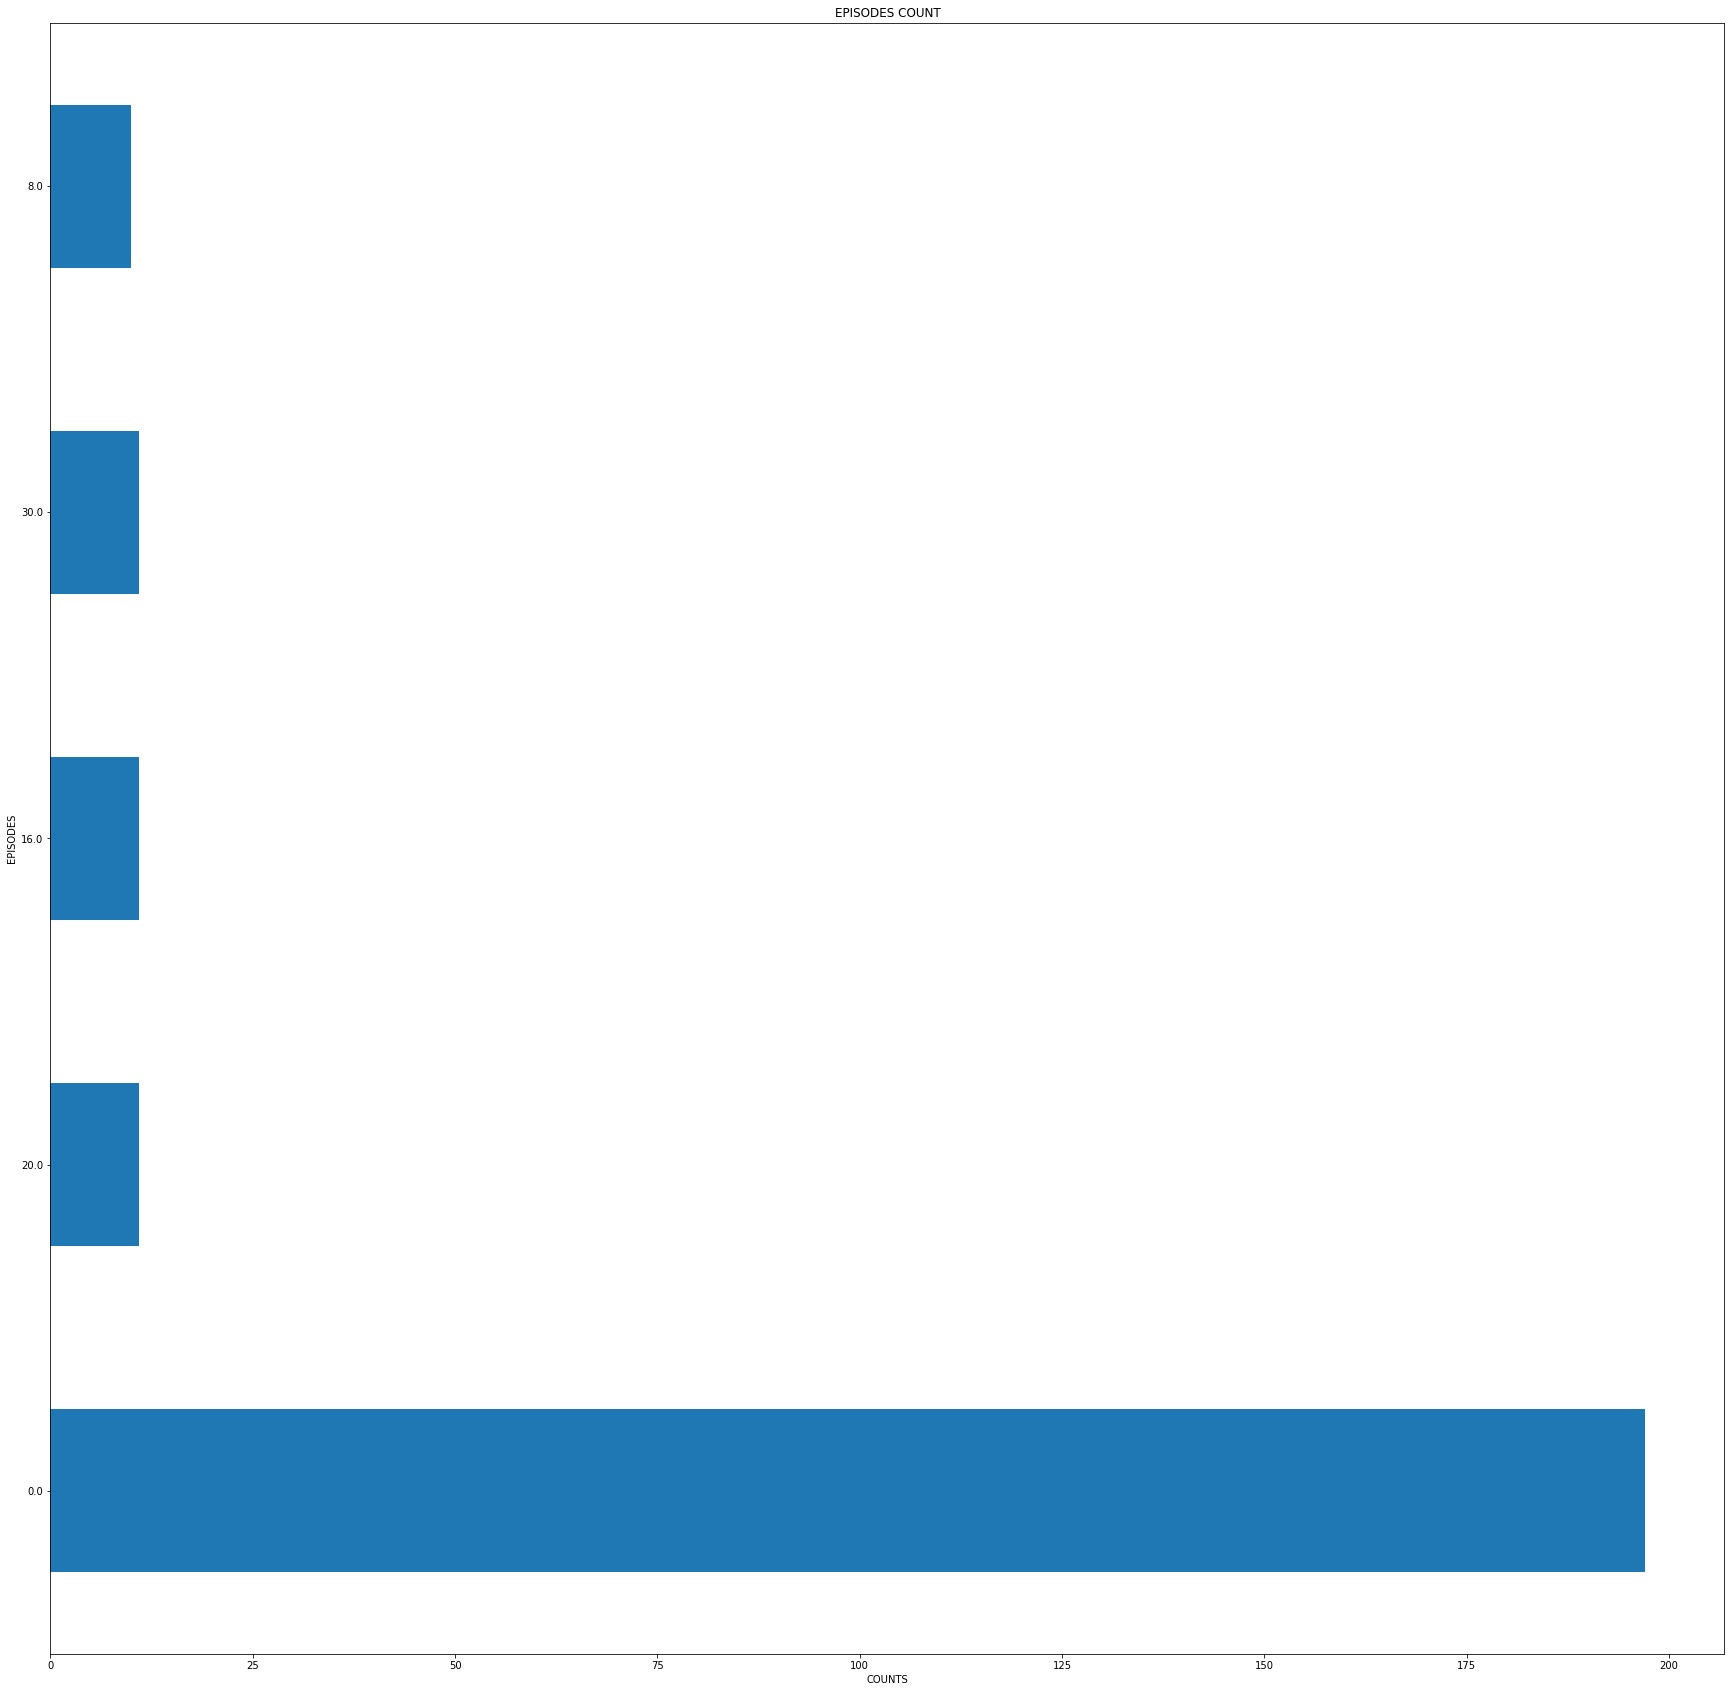

In [25]:
plt.figure(figsize=(30,30))                 #plotting the bar graph for epsiode count
df.episodes.value_counts().nlargest(5).plot(kind="barh")#taking only top 5 into consideration
plt.title("EPISODES COUNT")
plt.xlabel("COUNTS")
plt.ylabel("EPISODES")

## COUNTRY OF ORIGIN FROM DATA

<AxesSubplot:ylabel='orign_country'>

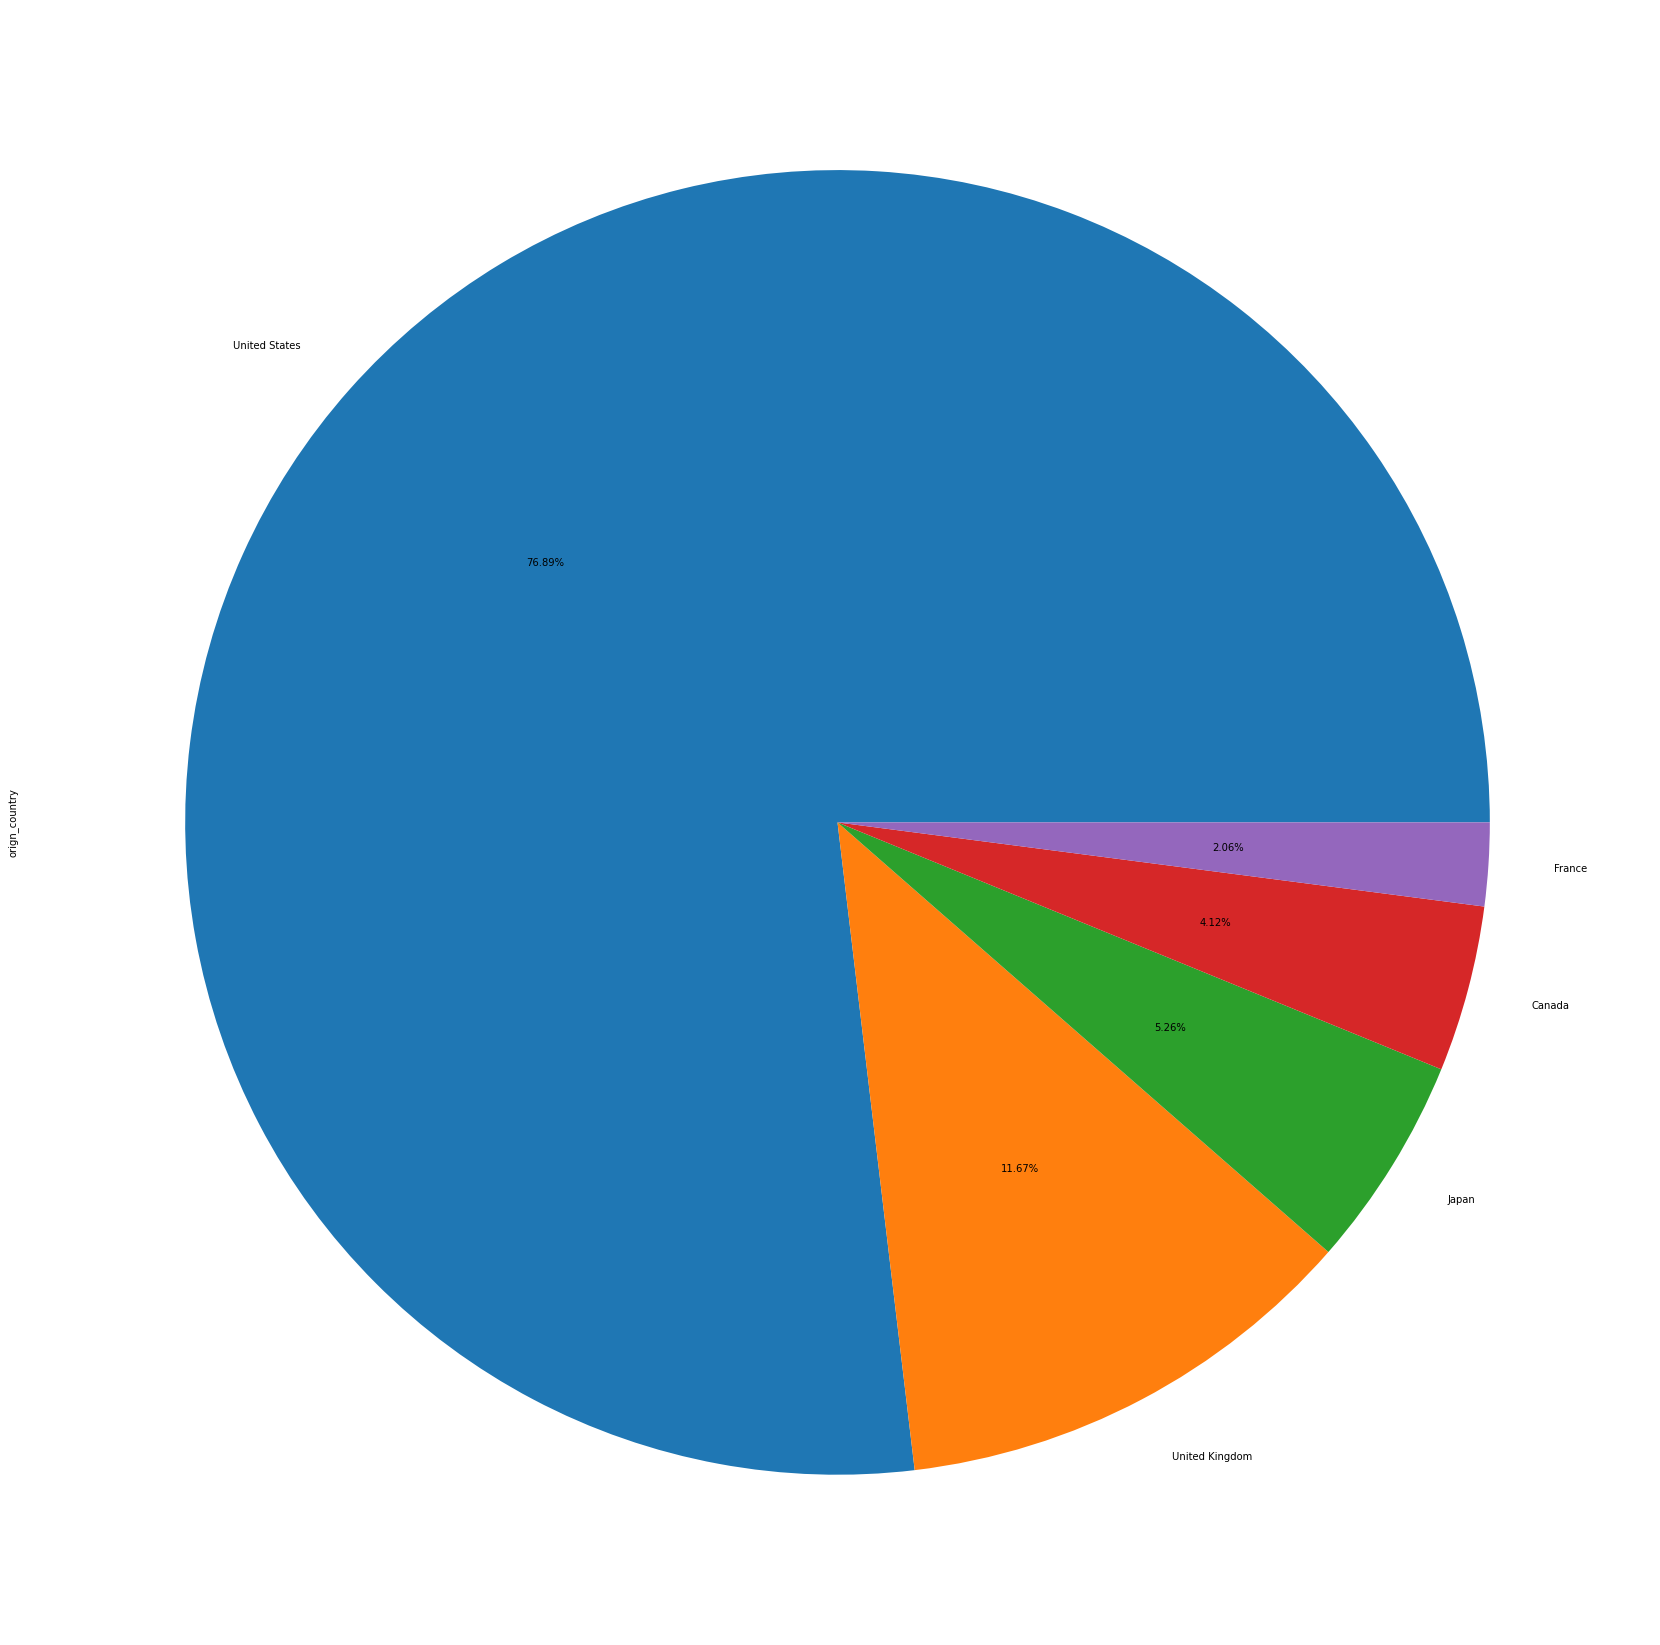

In [26]:
plt.figure(figsize=(30,30))
df["orign_country"].value_counts().nlargest(5).plot.pie(autopct="%1.2f%%")#taking only top 5 into consideration

In [27]:
df["orign_country"].value_counts().head(5)  #To know the exact count

United States     336
United Kingdom     51
Japan              23
Canada             18
France              9
Name: orign_country, dtype: int64

In [28]:
df[df["orign_country"]=="United States"].sort_values(by="title").head(3) #To know the USA origin movies

,title,popular_rank,certificate,startYear,endYear,episodes,runtime,type,orign_country,language,plot,rating,numVotes,genres,cast
sr no,,,,,,,,,,,,,,,
38,101 Dalmatians,39,Not Rated,1996.0,0.0,0.0,103,movie,United States,English,An evil high-fashion designer plots to steal D...,5.7,103845.0,"Adventure,Comedy,Crime","['Glenn Close', 'Jeff Daniels', 'Joely Richard..."
158,13 Reasons Why,159,16+,2017.0,2020.0,49.0,60,tvSeries,United States,English,"Follows teenager Clay Jensen, in his quest to ...",7.6,262439.0,"Drama,Mystery,Thriller","['Dylan Minnette', 'Katherine Langford', 'Chri..."
159,300,160,A,2006.0,0.0,0.0,117,movie,United States,English,King Leonidas of Sparta and a force of 300 men...,7.6,746309.0,"Action,Drama","['Gerard Butler', 'Lena Headey', 'David Wenham..."


In [29]:
df[df["orign_country"]=="India"].sort_values(by="title").head(5)#To know the INDIA origin movies

,title,popular_rank,certificate,startYear,endYear,episodes,runtime,type,orign_country,language,plot,rating,numVotes,genres,cast
sr no,,,,,,,,,,,,,,,
386,Sardar Ka Grandson,388,13,2021.0,0.0,0.0,139,movie,India,Hindi,A devoted grandson embarks on a complicated an...,4.1,3690.0,"Comedy,Drama,Romance","['Neena Gupta', 'Arjun Kapoor', 'Rakul Preet S..."
462,The White Tiger,465,16,2021.0,0.0,0.0,125,movie,India,Hindi,An ambitious Indian driver uses his wit and cu...,7.1,49579.0,"Crime,Drama","['Adarsh Gourav', 'Rajkummar Rao', 'Priyanka C..."


In [30]:
df[df["orign_country"]=="Japan"].sort_values(by="title").head(5) #To know the JAPAN origin movies

,title,popular_rank,certificate,startYear,endYear,episodes,runtime,type,orign_country,language,plot,rating,numVotes,genres,cast
sr no,,,,,,,,,,,,,,,
409,Alice in Borderland,411,18,2020.0,0.0,9.0,50,tvSeries,Japan,English,A group of bored delinquents are transported t...,7.7,21122.0,"Action,Fantasy,Mystery","['Kento Yamazaki', 'Tao Tsuchiya', 'Nijirô Mur..."
262,Black Clover,263,13,2017.0,2021.0,170.0,24,tvSeries,Japan,Japanese,Asta and Yuno were abandoned together at the s...,8.3,12037.0,"Action,Adventure,Animation","['Dallas Reid', 'Cris George', 'Jill Harris', ..."
485,Bleach: Burîchi,488,16,2004.0,2012.0,368.0,24,tvSeries,Japan,Japanese,"High school student Ichigo Kurosaki, who has t...",8.1,45515.0,"Action,Adventure,Animation","['Johnny Yong Bosch', 'Michelle Ruff', 'Stepha..."
70,Boku no hîrô akademia,71,16,2016.0,0.0,104.0,24,tvSeries,Japan,Japanese,A superhero-loving boy without any powers is d...,8.5,41587.0,"Action,Adventure,Animation","['Daiki Yamashita', 'Nobuhiko Okamoto', 'Ayane..."
197,Death Note: Desu nôto,198,16+,2006.0,2007.0,37.0,24,tvSeries,Japan,Japanese,An intelligent high school student goes on a s...,9.0,255281.0,"Animation,Crime,Drama","['Mamoru Miyano', 'Brad Swaile', 'Vincent Tong..."


## MOVIE WITH LANGUAGE OF RELEASE

<AxesSubplot:>

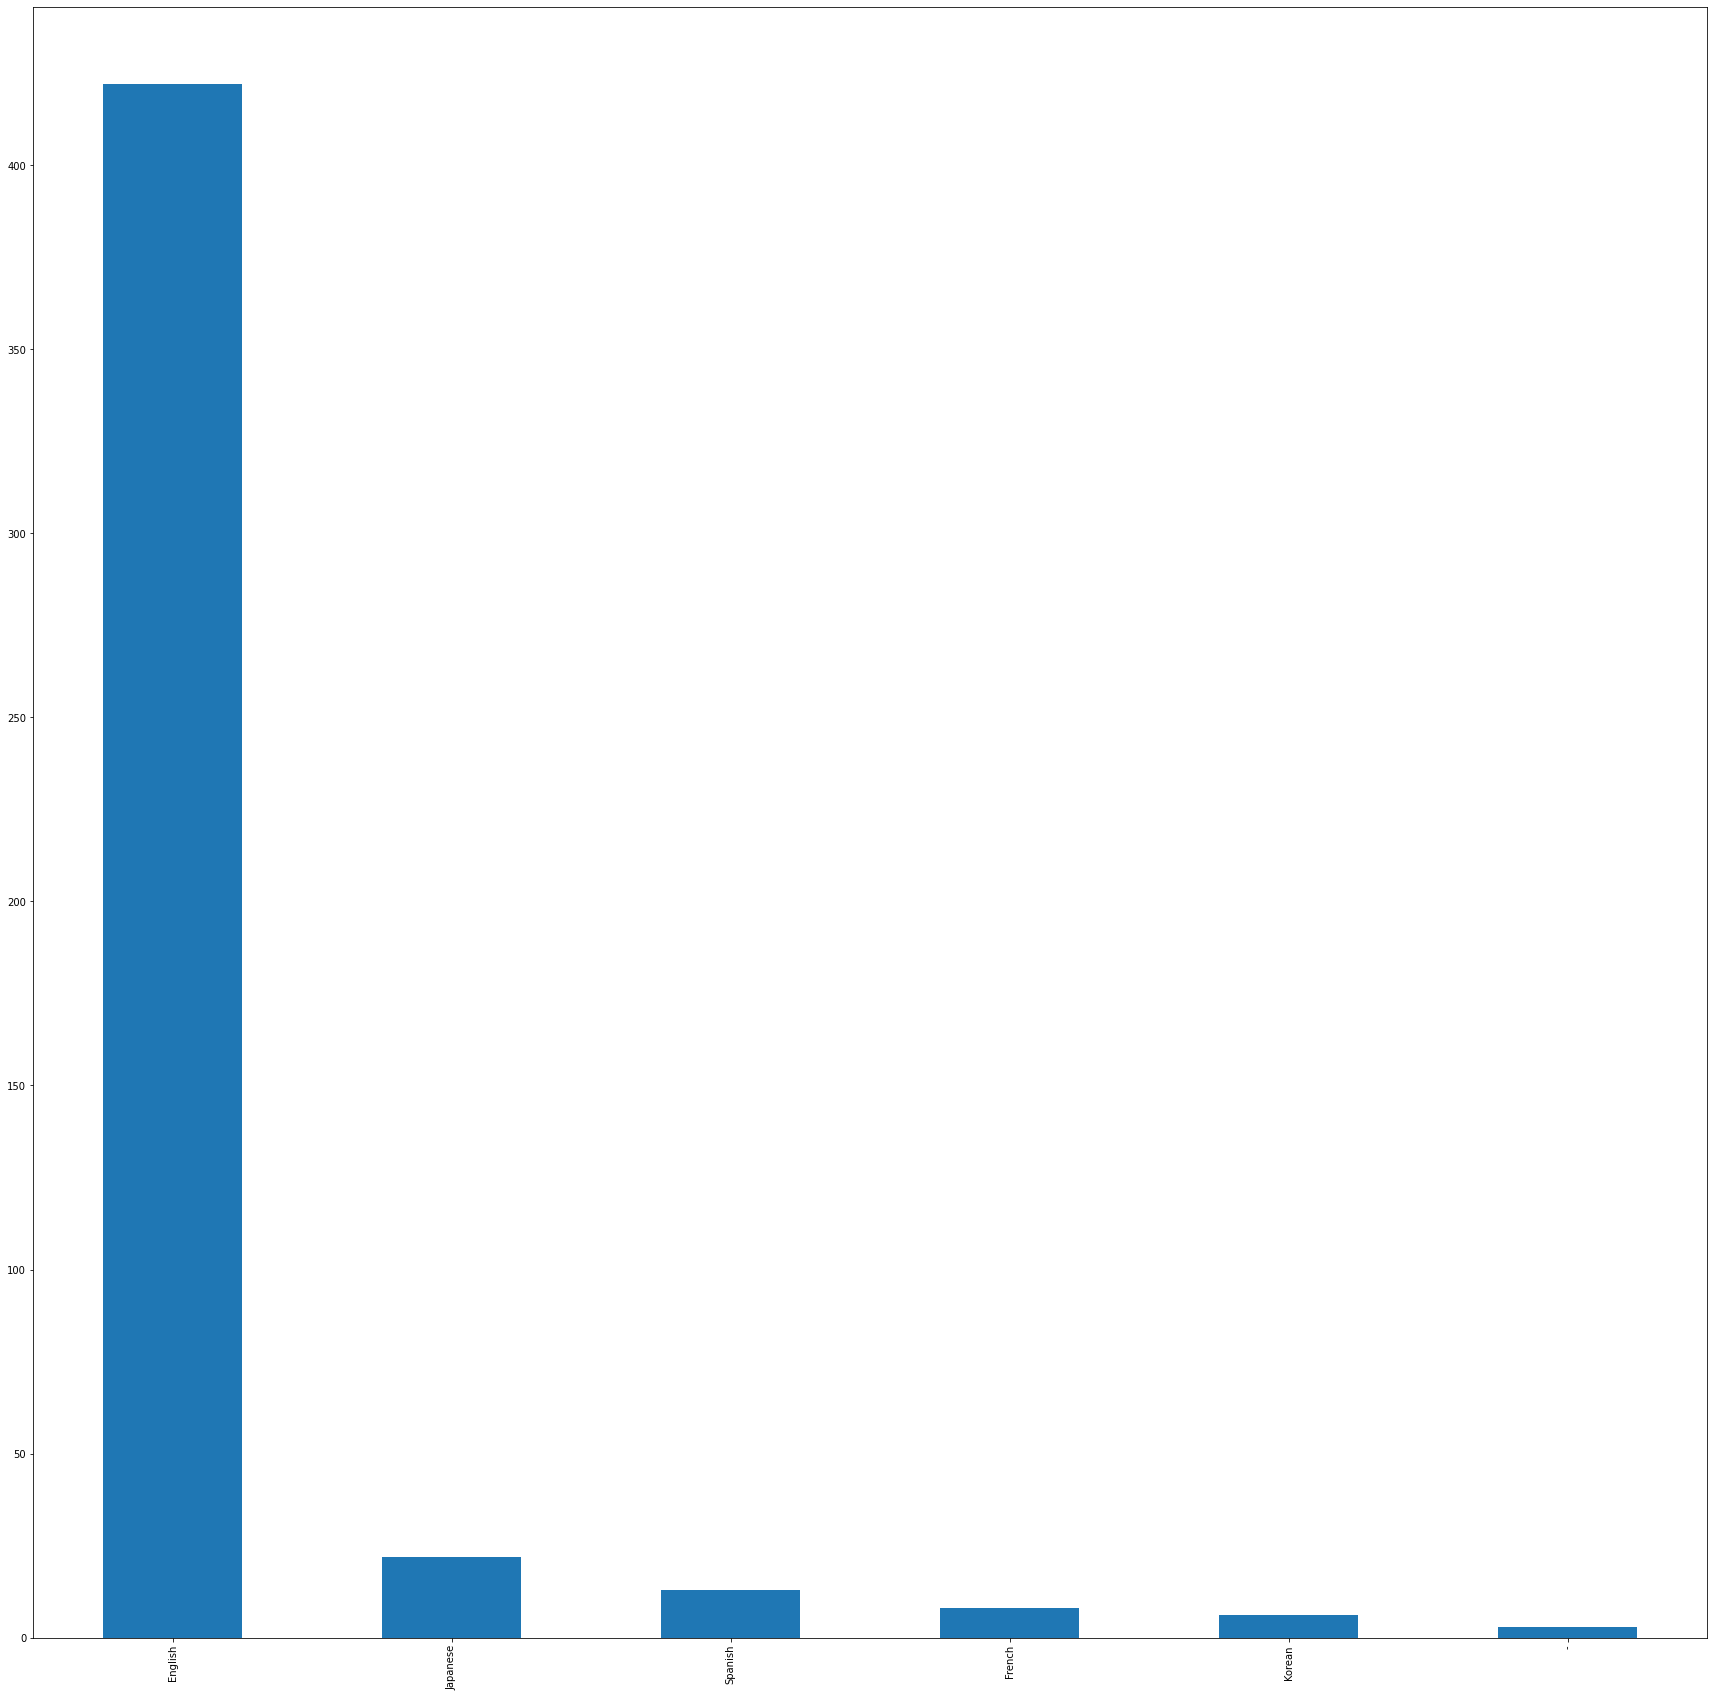

In [31]:
plt.figure(figsize=(30,30))
df["language"].value_counts().nlargest(6).plot.bar()#taking only top 6 into consideration


In [32]:
df["language"].value_counts(normalize=True).head(5)   #For overview of above to see the % of data

English     0.842315
Japanese    0.043912
Spanish     0.025948
French      0.015968
Korean      0.011976
Name: language, dtype: float64

## RATING OF MOVIES IN DATA SET

<AxesSubplot:xlabel='rating', ylabel='count'>

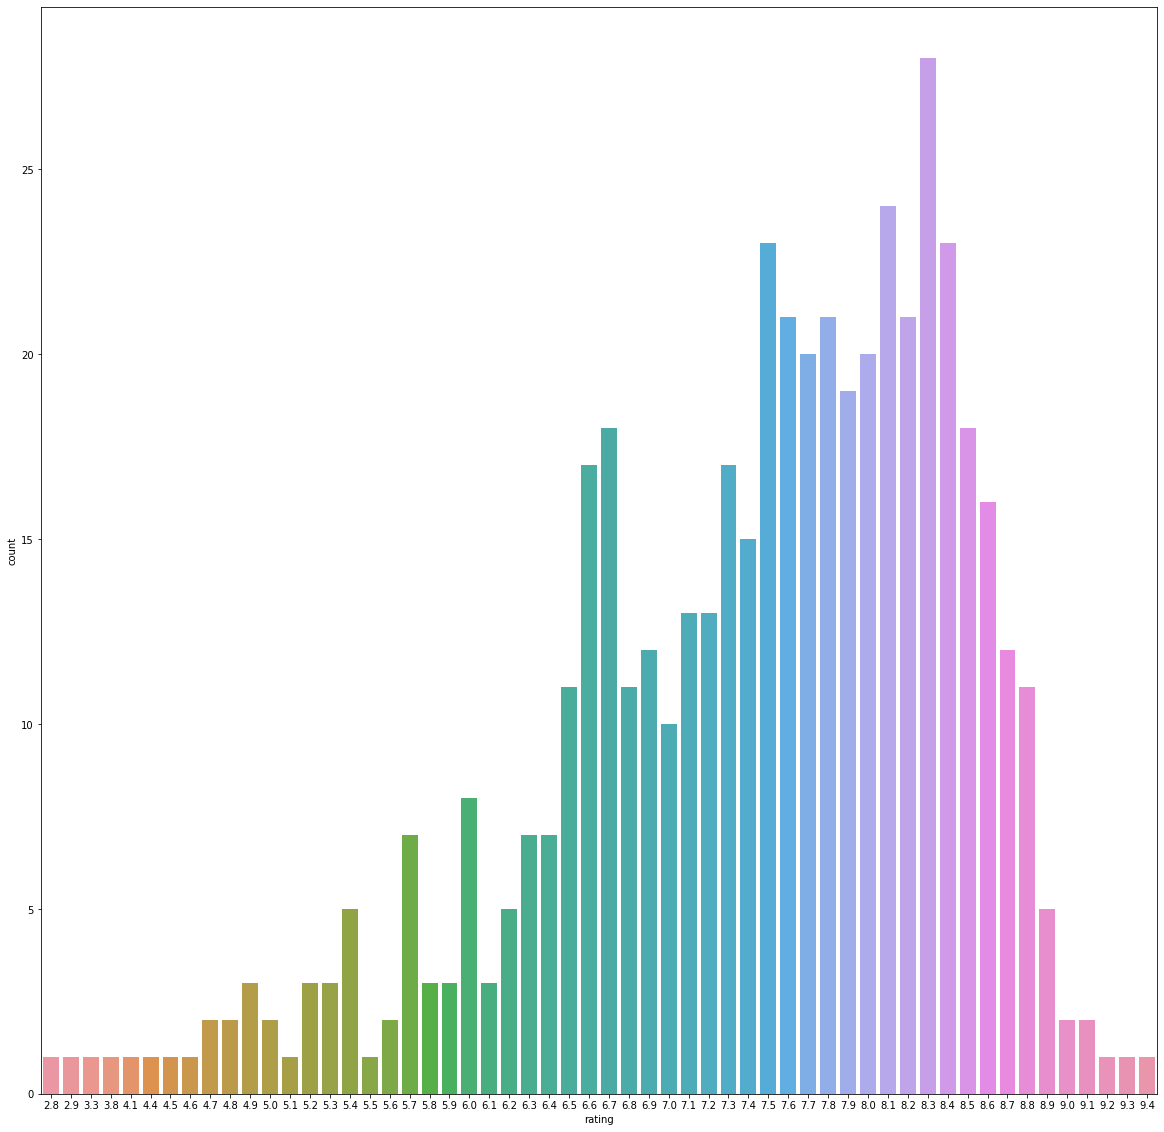

In [33]:
plt.figure(figsize=[20,20])
sns.countplot(x="rating",data=df)

In [34]:
df[df["rating"]==9.4]  # only one movie with highest rating from the data

,title,popular_rank,certificate,startYear,endYear,episodes,runtime,type,orign_country,language,plot,rating,numVotes,genres,cast
sr no,,,,,,,,,,,,,,,
14,Breaking Bad,15,18,2008.0,2013.0,62.0,49,tvSeries,United States,English,A high school chemistry teacher diagnosed with...,9.4,1523446.0,"Crime,Drama,Thriller","['Bryan Cranston', 'Aaron Paul', 'Anna Gunn', ..."


In [35]:
df.groupby(["rating","type"]).sum() # this sHOW the popular rank from the data and taking rating into considaration

,,popular_rank,startYear,endYear,episodes,numVotes
rating,type,,,,,
2.8,tvSeries,327,2006.0,2021.0,294.0,27266.0
2.9,movie,222,2020.0,0.0,0.0,7561.0
3.3,movie,38,2020.0,0.0,0.0,60267.0
3.8,movie,342,2021.0,0.0,0.0,407.0
4.1,movie,388,2021.0,0.0,0.0,3690.0
...,...,...,...,...,...,...
9.0,tvSeries,232,4019.0,4028.0,123.0,488412.0
9.1,tvSeries,323,4019.0,4029.0,84.0,959877.0
9.2,tvSeries,60,2013.0,0.0,42.0,394286.0


In [36]:
df.rating.value_counts().head(5)      #rating of movies the most in data

8.3    28
8.1    24
8.4    23
7.5    23
8.2    21
Name: rating, dtype: int64

In [37]:
df[df["rating"]==8.3].head(5)  # movie with 8.3 as rating

,title,popular_rank,certificate,startYear,endYear,episodes,runtime,type,orign_country,language,plot,rating,numVotes,genres,cast
sr no,,,,,,,,,,,,,,,
25,La casa de papel,26,16+,2017.0,2021.0,41.0,70,tvSeries,Spain,Spanish,An unusual group of robbers attempt to carry o...,8.3,329651.0,"Action,Crime,Mystery","['Úrsula Corberó', 'Álvaro Morte', 'Itziar Itu..."
29,Master of None,30,16,2015.0,0.0,25.0,30,tvSeries,United States,English,"The personal and professional life of Dev, a 3...",8.3,69338.0,"Comedy,Drama","['Aziz Ansari', 'Eric Wareheim', 'Lena Waithe'..."
43,Castlevania,44,18,2017.0,2021.0,32.0,23,tvSeries,United States,English,A vampire hunter fights to save a besieged cit...,8.3,48274.0,"Action,Adventure,Animation","['Richard Armitage', 'James Callis', 'Alejandr..."
48,How I Met Your Mother,49,15+,2005.0,2014.0,208.0,22,tvSeries,United States,English,A father recounts to his children - through a ...,8.3,617378.0,"Comedy,Romance","['Josh Radnor', 'Jason Segel', 'Cobie Smulders..."
72,Homeland,73,UA,2011.0,2020.0,96.0,55,tvSeries,United States,English,A bipolar CIA operative becomes convinced a pr...,8.3,319964.0,"Crime,Drama,Mystery","['Claire Danes', 'Mandy Patinkin', 'Damian Lew..."


## THE TYPES PRESENT IN DATA SET

In [38]:
df["type"].value_counts()     #sseing for types of movies

tvSeries        288
movie           196
tvMiniSeries     16
tvSpecial         1
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

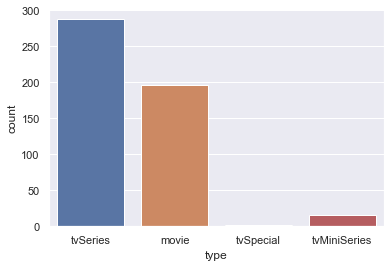

In [39]:
sns.set_theme(style="darkgrid")
sns.countplot(x=df.type,data=df)


In [40]:
df[(df["type"]=="tvSeries")&(df["rating"]>8.0)] .head(5)   #showing tvseries with more then 8.0 rating

,title,popular_rank,certificate,startYear,endYear,episodes,runtime,type,orign_country,language,plot,rating,numVotes,genres,cast
sr no,,,,,,,,,,,,,,,
0,Lucifer,1,15,2016.0,0.0,93.0,42,tvSeries,United States,English,Lucifer Morningstar has decided he's had enoug...,8.1,250884.0,"Crime,Drama,Fantasy","['Tom Ellis', 'Lauren German', 'Lesley-Ann Bra..."
2,The Kominsky Method,3,18,2018.0,2021.0,22.0,30,tvSeries,United States,English,"An aging actor, who long ago enjoyed a brush w...",8.2,28795.0,"Comedy,Drama","['Michael Douglas', 'Sarah Baker', 'Graham Rog..."
3,Friends,4,13+,1994.0,2004.0,235.0,22,tvSeries,United States,English,Follows the personal and professional lives of...,8.9,861843.0,"Comedy,Romance","['Jennifer Aniston', 'Courteney Cox', 'Lisa Ku..."
7,Sweet Tooth,8,16,2021.0,0.0,8.0,\N,tvSeries,United States,English,A boy who is half human and half deer survives...,8.2,9622.0,"Action,Adventure,Drama","['Nonso Anozie', 'Christian Convery', 'Stefani..."
11,The Walking Dead,12,18+,2010.0,2022.0,177.0,44,tvSeries,United States,English,Sheriff Deputy Rick Grimes wakes up from a com...,8.2,873752.0,"Drama,Horror,Thriller","['Andrew Lincoln', 'Norman Reedus', 'Melissa M..."


## SORTING ACCORDING TO GENRES

In [41]:
df["genres"].value_counts()  #counting for genres of movies in data set

Crime,Drama,Mystery           33
Action,Crime,Drama            26
Action,Adventure,Animation    24
Action,Adventure,Drama        23
Comedy                        22
                              ..
Action,Adventure,Mystery       1
Adventure,Drama,Mystery        1
Action,Sci-Fi                  1
Action,Drama,Horror            1
Animation,Drama,Fantasy        1
Name: genres, Length: 143, dtype: int64

<AxesSubplot:>

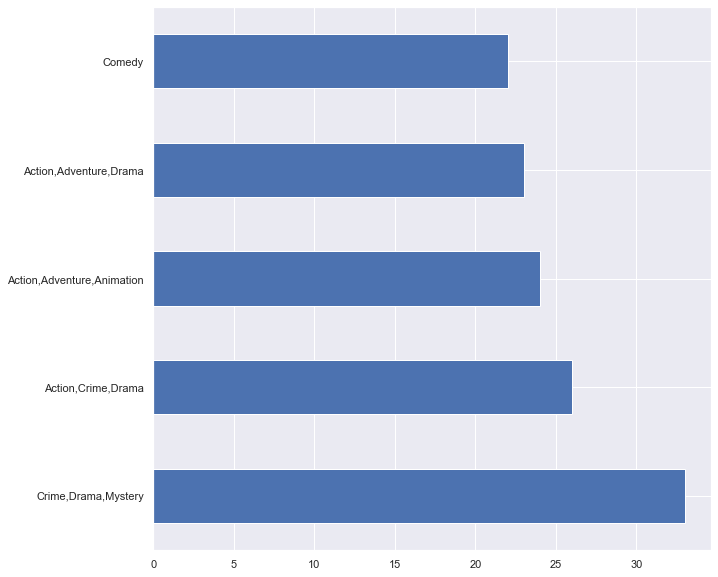

In [42]:
plt.figure(figsize=(10,10))
df["genres"].value_counts().nlargest(5).plot.barh()#taking only top 5 into consideration

In [43]:
df[df["genres"]=="Crime,Drama,Mystery"].sort_values(by="title").head(5)   #crime,drama,mystery movies from data

,title,popular_rank,certificate,startYear,endYear,episodes,runtime,type,orign_country,language,plot,rating,numVotes,genres,cast
sr no,,,,,,,,,,,,,,,
98,Blue Bloods,99,Not Rated,2010.0,0.0,235.0,43,tvSeries,United States,English,Revolves around a family of New York cops.,7.6,33475.0,"Crime,Drama,Mystery","['Donnie Wahlberg', 'Bridget Moynahan', 'Will ..."
142,Broadchurch,143,16,2013.0,2017.0,24.0,48,tvSeries,United Kingdom,English,The murder of a young boy in a small coastal t...,8.4,98727.0,"Crime,Drama,Mystery","['David Tennant', 'Olivia Colman', 'Jodie Whit..."
122,CSI: Crime Scene Investigation,123,16,2000.0,2015.0,336.0,60,tvSeries,United States,English,Series following an elite team of police foren...,7.6,77901.0,"Crime,Drama,Mystery","['Laurence Fishburne', 'Marg Helgenberger', 'G..."
303,Contratiempo,304,16,2016.0,0.0,0.0,106,movie,Spain,Spanish,A successful entrepreneur accused of murder an...,8.1,153843.0,"Crime,Drama,Mystery","['Mario Casas', 'Ana Wagener', 'Jose Coronado'..."
71,Dark,72,16+,2017.0,2020.0,26.0,60,tvSeries,Germany,German,"A family saga with a supernatural twist, set i...",8.8,304265.0,"Crime,Drama,Mystery","['Louis Hofmann', 'Karoline Eichhorn', 'Lisa V..."


In [44]:
df[(df["genres"]=="Action,Crime,Drama") & (df["rating"]>8.0) & (df["type"]=="tvSeries")].head(5)   #action movies from data set with  above 8.0 rating

,title,popular_rank,certificate,startYear,endYear,episodes,runtime,type,orign_country,language,plot,rating,numVotes,genres,cast
sr no,,,,,,,,,,,,,,,
75,Prison Break,76,UA,2005.0,2017.0,90.0,44,tvSeries,United Kingdom,English,"Due to a political conspiracy, an innocent man...",8.3,487161.0,"Action,Crime,Drama","['Dominic Purcell', 'Wentworth Miller', 'Amaur..."
138,The Punisher,139,A,2017.0,2019.0,26.0,53,tvSeries,United States,English,"After the murder of his family, Marine veteran...",8.5,191192.0,"Action,Crime,Drama","['Jon Bernthal', 'Amber Rose Revah', 'Ben Barn..."
144,Daredevil,145,18+,2015.0,2018.0,39.0,54,tvSeries,United States,English,"A blind lawyer by day, vigilante by night. Mat...",8.6,370631.0,"Action,Crime,Drama","['Charlie Cox', ""Vincent D'Onofrio"", 'Deborah ..."
176,Longmire,177,Not Rated,2012.0,2017.0,63.0,60,tvSeries,United States,English,Walt Longmire is the dedicated and unflappable...,8.3,30128.0,"Action,Crime,Drama","['Robert Taylor', 'Katee Sackhoff', 'Lou Diamo..."


## CONCULSION

1] This movies has 18+ movie content more in data(eg-6 underground,after life ,etc)
2] We come to conculsion that 2020 has highest movies released dispite of covid situtaion followed by year 2021
3] We can eatch movie without episode that is (300, 300:rise of empire)
4] United state produced the highest movie that is 336 followed by uk and japan
5] Among the rating the highest movie rated was "the breaking bad" with (9.4) and in data set we have movie of rating (8.3) more
6] There are different movie language out of most movie are made in english(84%),japanese(43%)
7] Data says there are more tv series more then that of movies

    

# Now some movies suggestion according to the data

1] If the choice is crime movies we can watch (line of duty-8.7 rating)|(Dexter-8.6 rating)|(Dark-8.8 rating)
2] If someone has action movies as there choice (Prison Break-8.3 rating)|(Punisher-8.5 rating)|(DareDevil-8.6 rating)
3] If tv series is choice which is long enough u can look over Friends, lucifer, The Waking Deads
4] Indian movie is The white tiger 
5] If according to rating u want to want go for Nauruto, Homeland ,Prison Break

## THANKYOU